In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

training_samples = pd.read_csv("vu-dmt-assigment-2-2023/training_set_VU_DM.csv")
test_samples = pd.read_csv("vu-dmt-assigment-2-2023/test_set_VU_DM.csv")

In [17]:
training_samples.info()
training_samples.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   srch_id                      int64         
 1   date_time                    datetime64[ns]
 2   site_id                      int64         
 3   visitor_location_country_id  int64         
 4   visitor_hist_starrating      float64       
 5   visitor_hist_adr_usd         float64       
 6   prop_country_id              int64         
 7   prop_id                      int64         
 8   prop_starrating              int64         
 9   prop_review_score            float64       
 10  prop_brand_bool              int64         
 11  prop_location_score1         float64       
 12  prop_location_score2         float64       
 13  prop_log_historical_price    float64       
 14  position                     int64         
 15  price_usd                    float64       
 16  

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [18]:
test_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4959183 entries, 0 to 4959182
Data columns (total 50 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   date_time                    object 
 2   site_id                      int64  
 3   visitor_location_country_id  int64  
 4   visitor_hist_starrating      float64
 5   visitor_hist_adr_usd         float64
 6   prop_country_id              int64  
 7   prop_id                      int64  
 8   prop_starrating              int64  
 9   prop_review_score            float64
 10  prop_brand_bool              int64  
 11  prop_location_score1         float64
 12  prop_location_score2         float64
 13  prop_log_historical_price    float64
 14  price_usd                    float64
 15  promotion_flag               int64  
 16  srch_destination_id          int64  
 17  srch_length_of_stay          int64  
 18  srch_booking_window          int64  
 19  

In [19]:
# No duplicates rows exist in the training samples
training_samples[training_samples.duplicated()]

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool


Training samples and the test samples have almost the same amount of rows.

### Show the missing values

<AxesSubplot:>

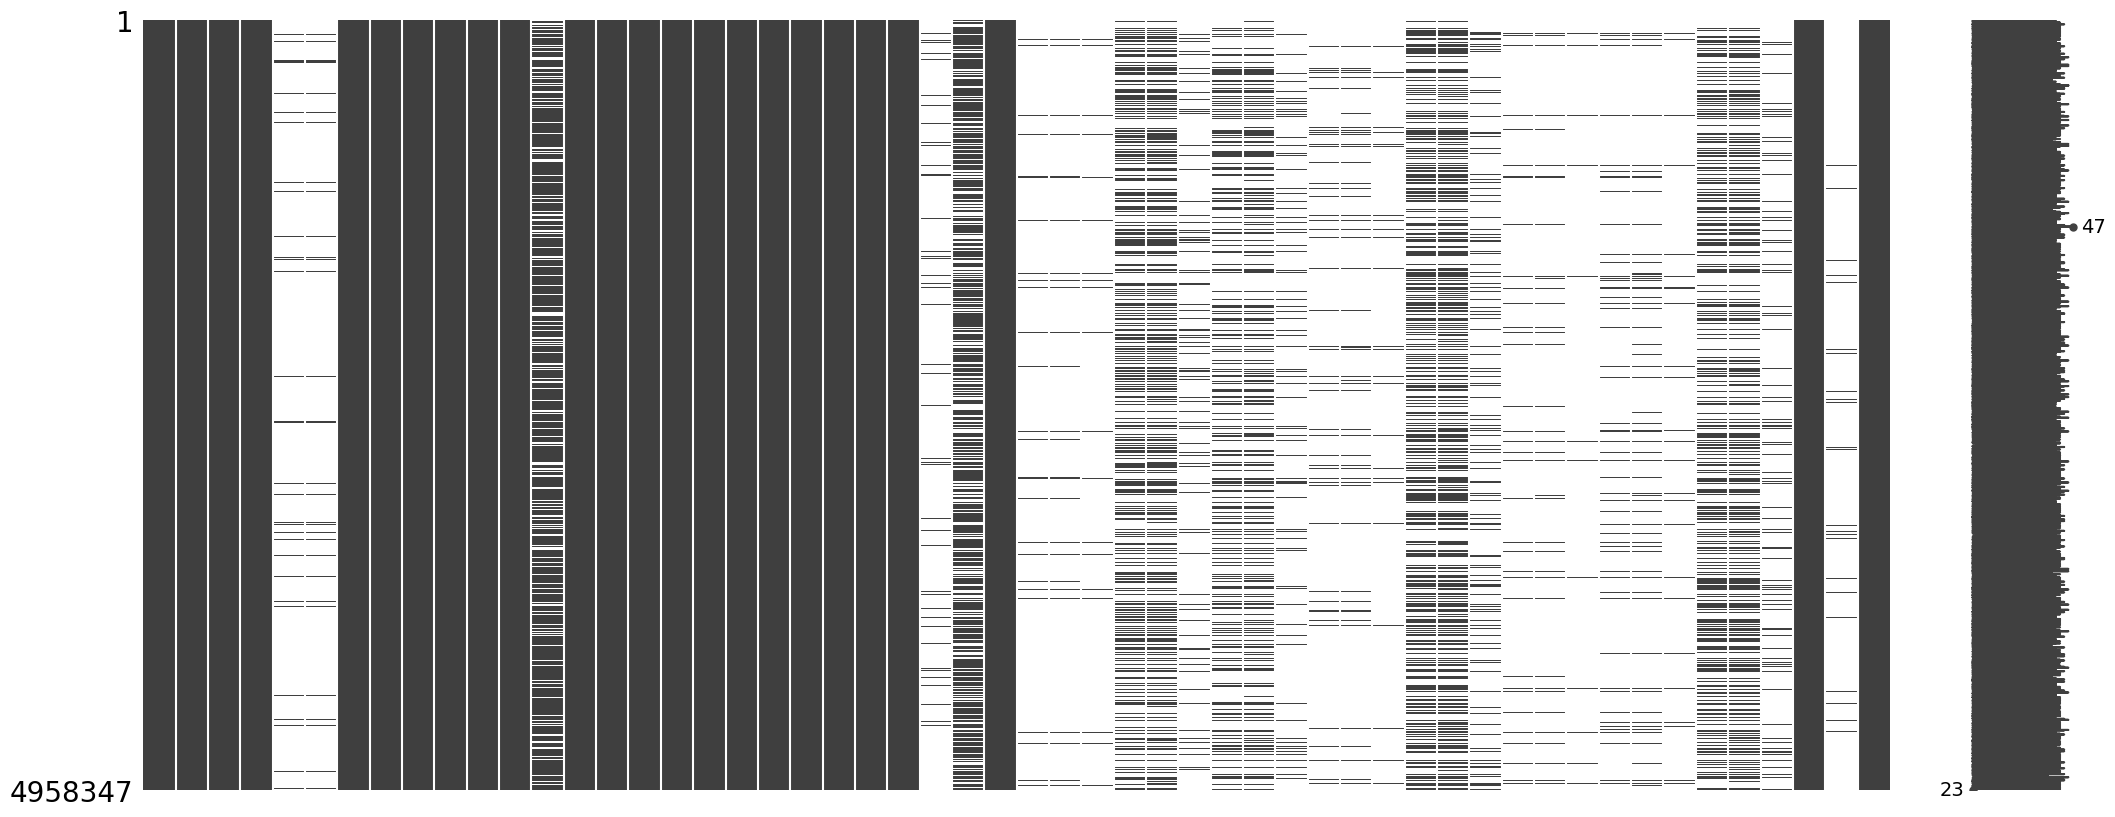

In [5]:
import missingno as msno

msno.matrix(training_samples)

<AxesSubplot:>

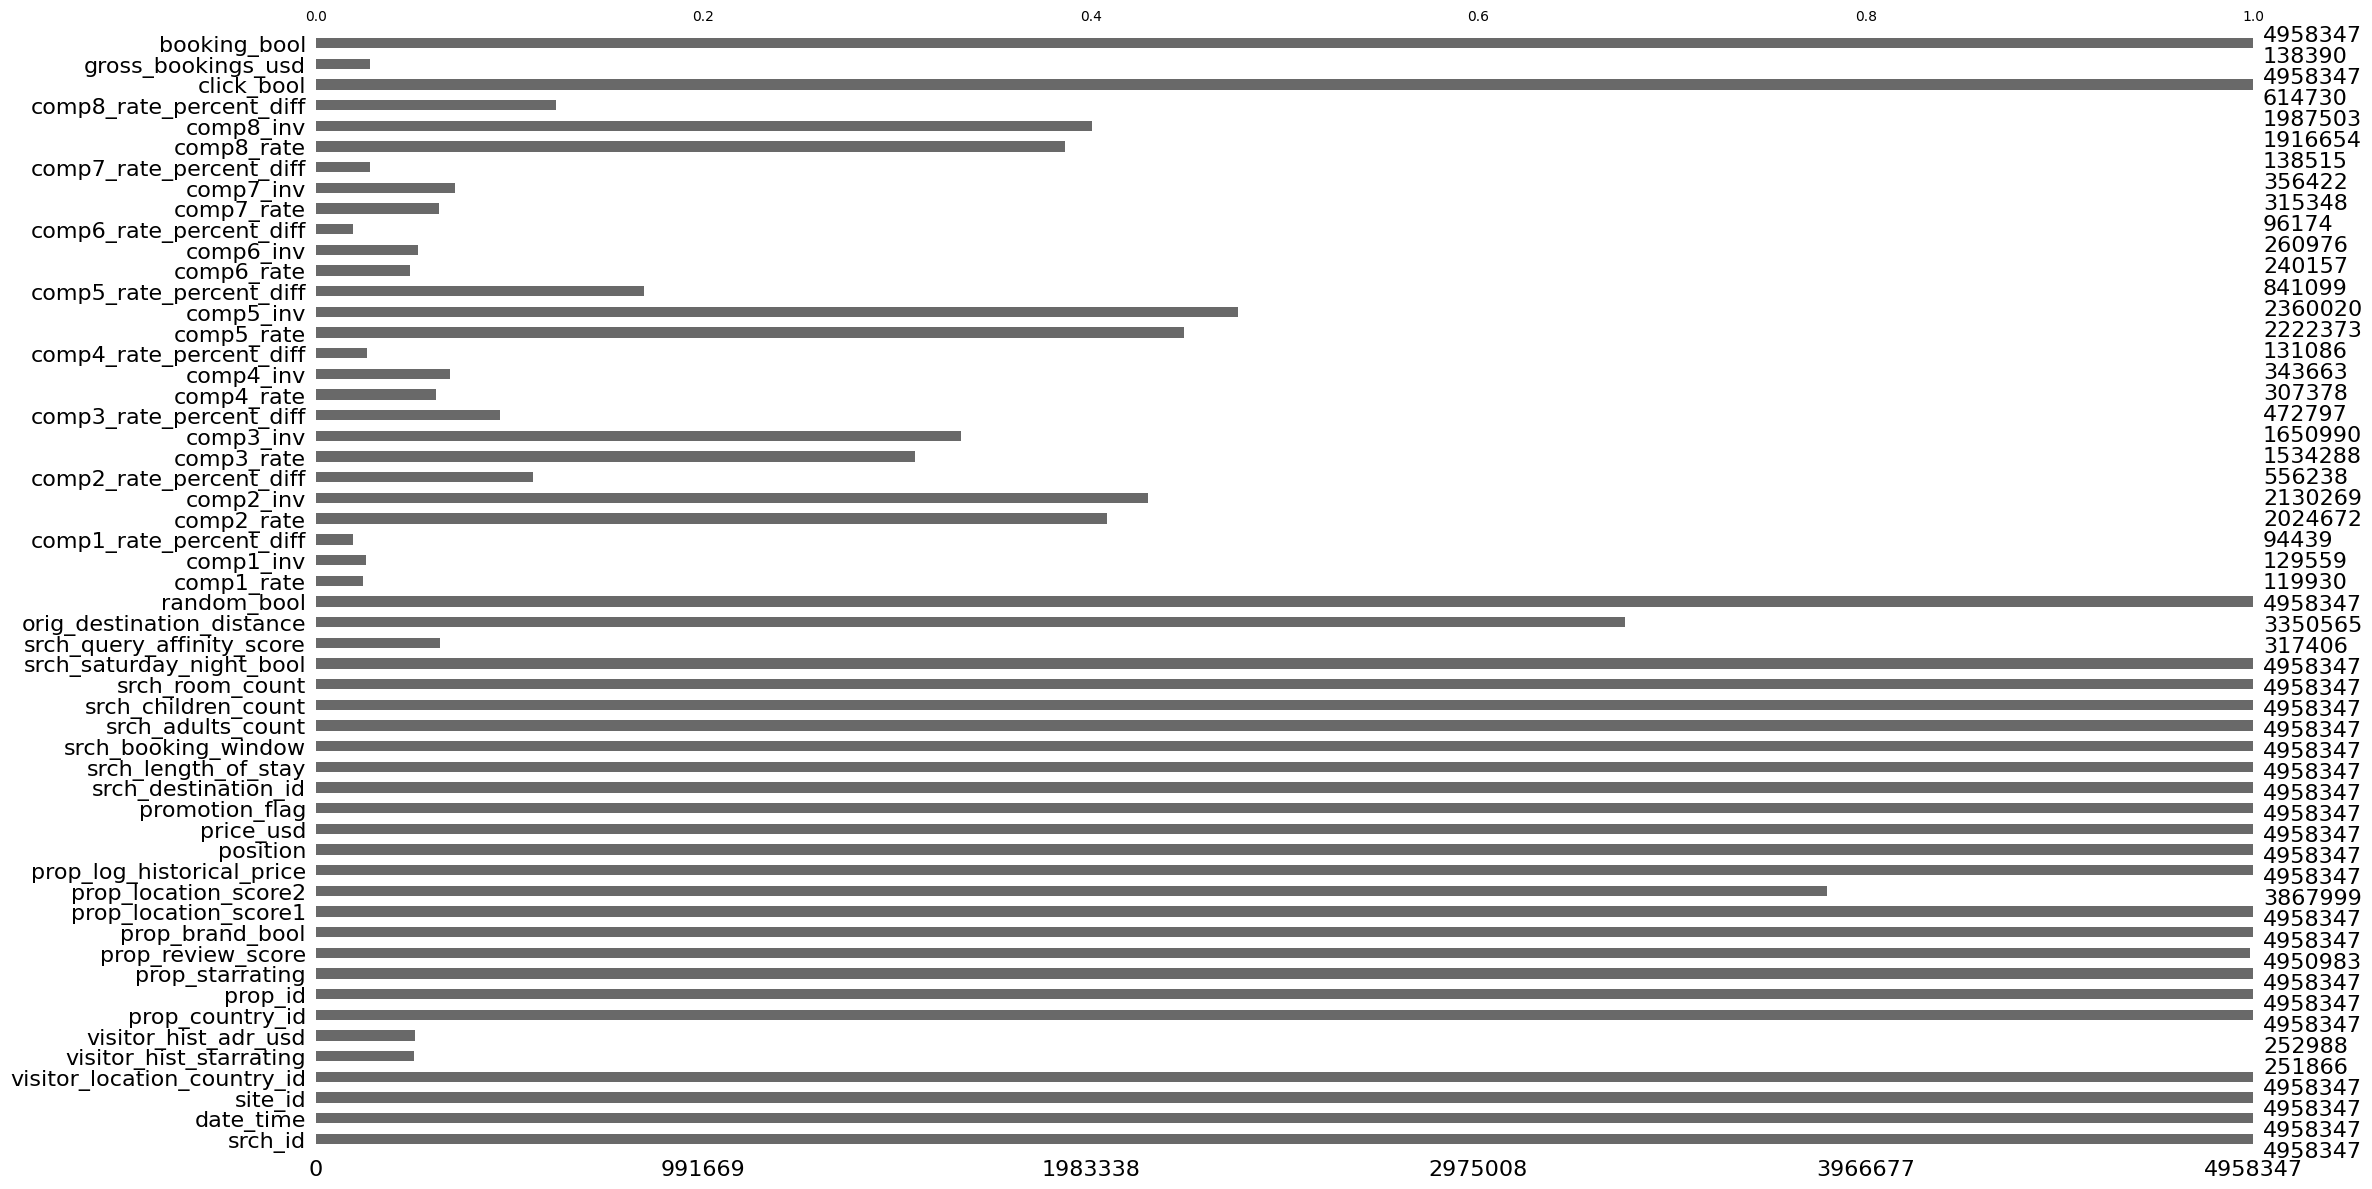

In [6]:
# Show how complete each variable it
msno.bar(training_samples)

In [20]:
# Convert datetime to date
training_samples["date_time"] = pd.to_datetime(training_samples["date_time"])

### Removing columns with too many NaN values.

In [24]:
training_samples.isna().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating              0
visitor_hist_adr_usd                 0
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score            0
orig_destination_distance

In [23]:
# Some variables we can set to 0 rather than 0
set_zero = ["visitor_hist_starrating", "visitor_hist_adr_usd", "srch_query_affinity_score"]
training_samples[set_zero] = training_samples[set_zero].fillna(0)

We can see that many comp variables have more than half of the rows missing, which is quite a lot. If we want to impute this data we would have a lot of artificial data that might not be correct according to reality. Therefore, we will remove columns that have more than half of the total rows missing.

In [25]:
missing_mask = training_samples.isna().sum() > 2500000
clean_training = training_samples.drop(training_samples.loc[:,missing_mask], axis=1)
clean_training.isna().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating              0
visitor_hist_adr_usd                 0
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score            0
orig_destination_distance

We are now left with many columns that have no NaN values or less than half of the total rows. prop_review_score has a low number of missing values, so we can impute these values. prop_location_score2 has a quite large number of missing values ~20%. We already have prop_location_score1 which describes something similar, according to the description. Therefore, we assume that the amount of information this variable might add might be excessive. 

orig_destination_distance is the physical distance between the hotel and the customer at the time of search. This variable does not seem very informative in combination with the number of missing values ~25% of the total set.

In [26]:
removing_cols = ["prop_location_score2", "orig_destination_distance"]
clean_training = clean_training.drop(removing_cols, axis=1)

### Detecting outliers and treating them

In order to get a better understanding of the distribution of our data, outlier detection would be a necessary step to evaluate the data. In our model we will treat outliers as missing values, this way we can have enough data to work with without the need to remove a lot of datapoints.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

new_training = clean_training.copy()

numeric_cols = new_training.select_dtypes(include=["float64", "int64"])

# Ids and bools don't have our interest since we know they distribution.
non_id_and_bool_ones = list(filter(lambda name: "id" not in name and "bool" not in name, numeric_cols.columns))
count_cols = list(filter(lambda name: 
                         "count" in name or 
                         "position" in name or 
                         "promotion" in name or 
                         "srch_length_of_stay" in name or 
                         "srch_booking_window" in name or
                         "star" in name, 
                         non_id_and_bool_ones))


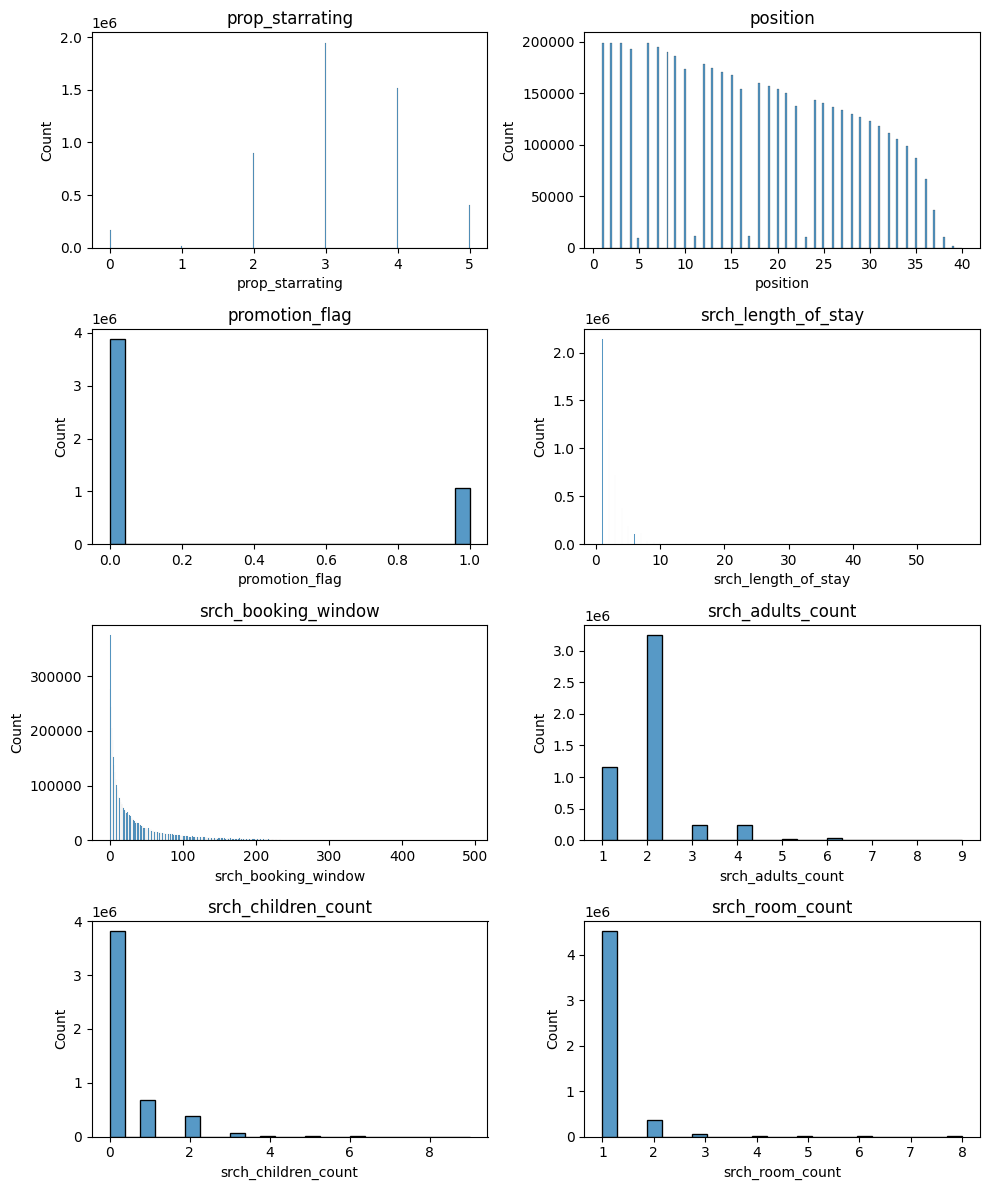

In [12]:
# Plot the counts
df_numeric = new_training[count_cols]

num_rows = len(df_numeric.columns) // 2 + len(df_numeric.columns) % 2

fig, axs = plt.subplots(num_rows, 2, figsize=(10, num_rows*3))

for i, col in enumerate(df_numeric.columns):
    ax = axs.flatten()[i]
    sns.histplot(new_training[col], ax=ax)
    ax.set_title(col)

# Remove unused subplots
if len(df_numeric.columns) % 2 != 0:
    fig.delaxes(axs.flatten()[-1])

plt.tight_layout()
plt.show()

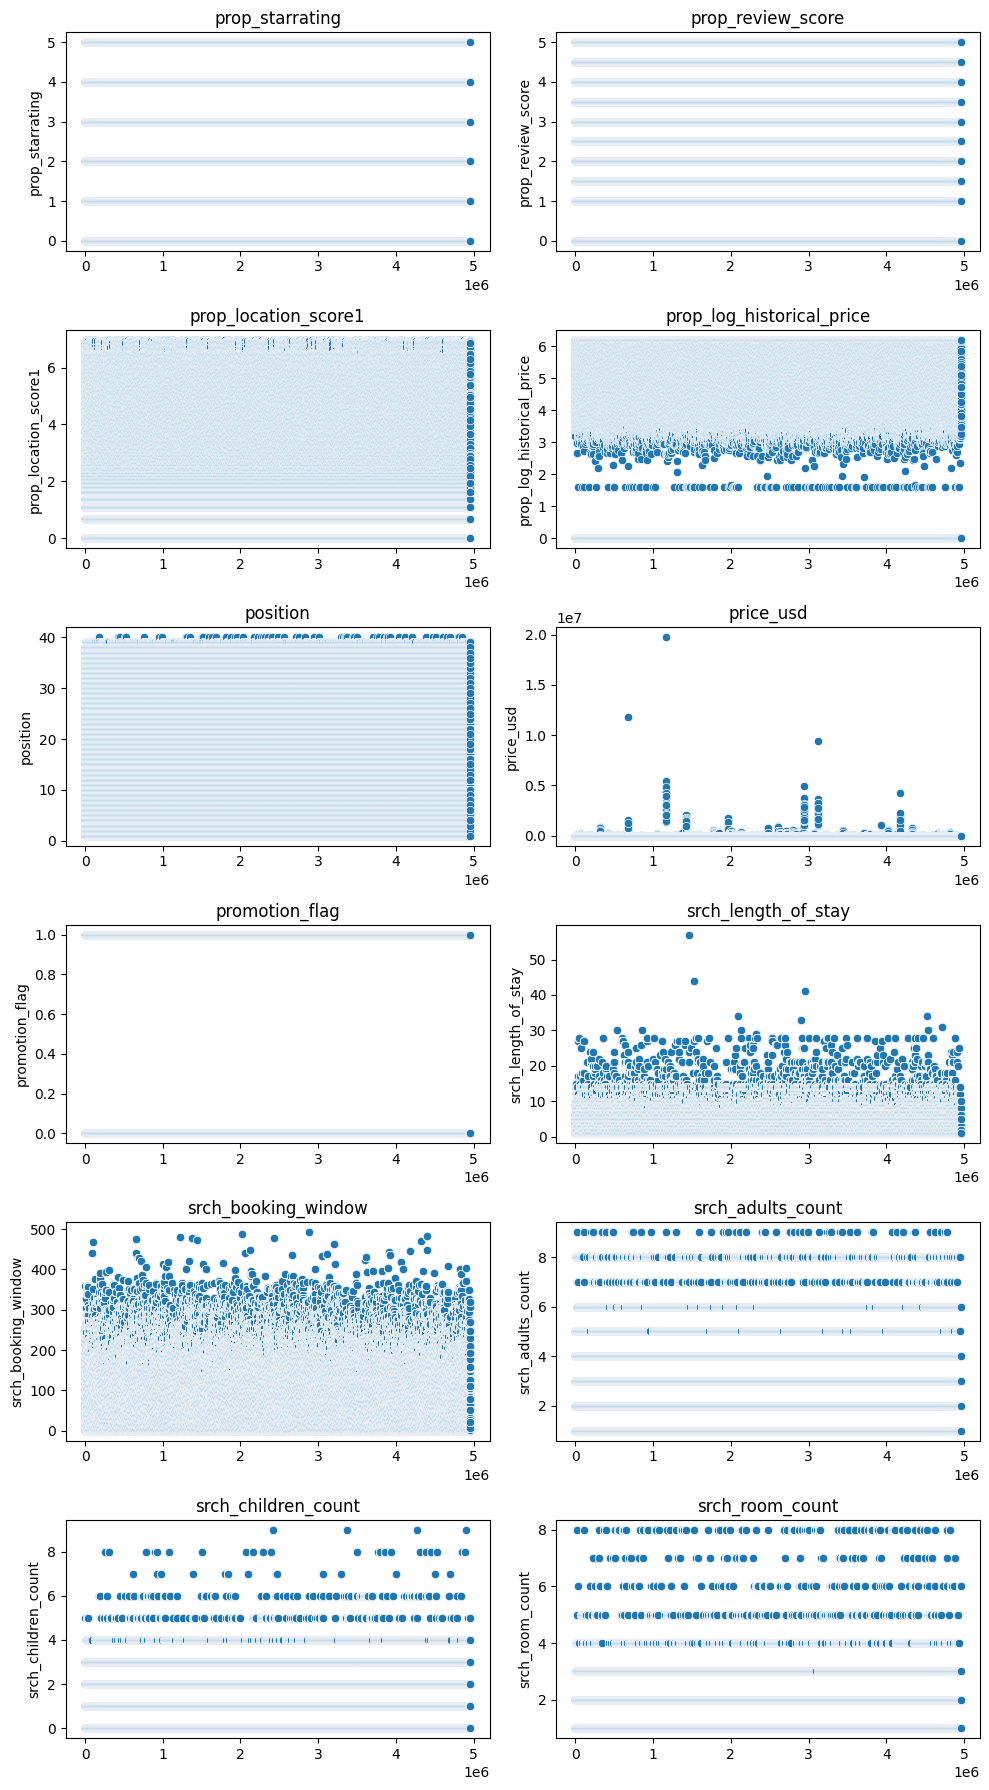

In [13]:
# Filter non numeric values
df_numeric = new_training[non_id_and_bool_ones]

num_rows = len(df_numeric.columns) // 2 + len(df_numeric.columns) % 2

fig, axs = plt.subplots(num_rows, 2, figsize=(10, num_rows*3))

for i, col in enumerate(df_numeric.columns):
    ax = axs.flatten()[i]
    sns.scatterplot(x=new_training.index, y=new_training[col], ax=ax)
    ax.set_title(col)

# Remove unused subplots
if len(df_numeric.columns) % 2 != 0:
    fig.delaxes(axs.flatten()[-1])

plt.tight_layout()
plt.show()

From our analysis we can see that price_usd and srch_length_of_stay have some outliers. 

## Convert to categorical values 

## Impute missing values

In [14]:
without_date = new_training.drop("date_time", axis=1)

In [15]:
from sklearn import SimpleImputer
imputer = SimpleImputer(n_neighbors=2, weights="uniform")
imputed_data = imputer.fit_transform(without_date) # Takes too long and causes notebook to crash
# We might need to chunk all the data into bits to impute on

In [16]:
new_training["date_time"]

0         2013-04-04 08:32:15
1         2013-04-04 08:32:15
2         2013-04-04 08:32:15
3         2013-04-04 08:32:15
4         2013-04-04 08:32:15
                  ...        
4958342   2013-06-30 19:55:18
4958343   2013-06-30 19:55:18
4958344   2013-06-30 19:55:18
4958345   2013-06-30 19:55:18
4958346   2013-06-30 19:55:18
Name: date_time, Length: 4958347, dtype: datetime64[ns]